# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#Dataset Generation

In [2]:
x,y=make_classification(n_samples=100,
    n_features=2,
    n_informative=2,
    n_classes=2,
    random_state=50,
    n_repeated=0,
    n_redundant=0
)
data=pd.DataFrame(data=x,columns=['A','B'])
data['LABEL']=y
data.head()

,A,B,LABEL
0,0.569080,0.292228,1
1,-0.613214,1.198760,1
2,-1.265264,0.098858,0
3,0.197930,-1.927592,0
4,-1.170918,-2.444945,0


#Preprocessing of Data

Performing standardization

In [3]:
x_scaler=StandardScaler().fit_transform(x)
df_x=pd.DataFrame(x_scaler)
df_x.sample(5)

,0,1
39,-0.806331,1.019189
78,2.283451,2.242163
68,-1.735533,-0.605088
91,-0.619861,0.806728
16,-1.308374,1.124452


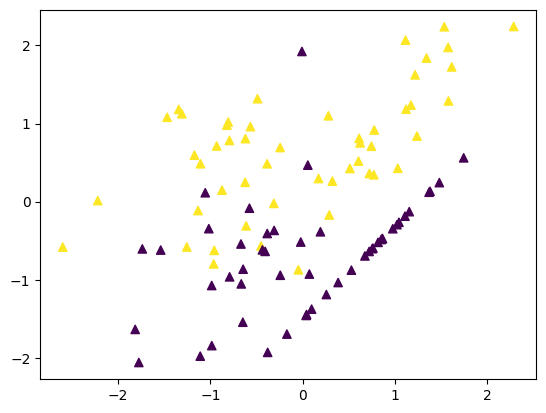

In [4]:
plt.scatter(df_x.iloc[:,0],df_x.iloc[:,1],c=y,marker='^')

# Train-Test split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(df_x,y,test_size=0.3,random_state=42)

# Specifying k

In [6]:
# No of neighbour i.e. K value input
k=int(input("Enter the value of k : "))
print(k)

Enter the value of k : 3
3


#Applying KNN:

In [7]:
model=KNeighborsClassifier(k)
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
print("Predicted values:")
print(pred_y)

Predicted values:
[1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1]


# Visualizing Predictions

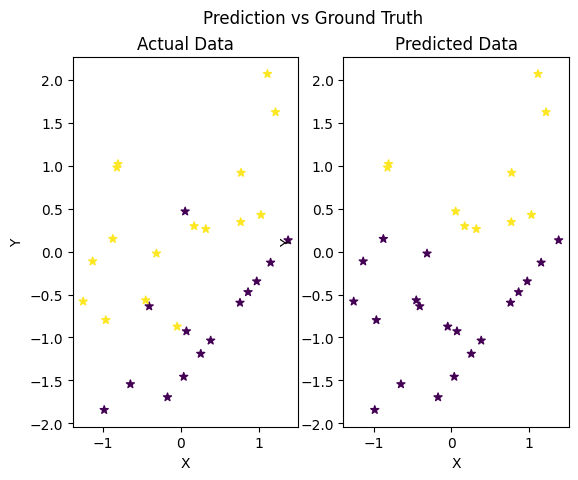

In [20]:
plt.subplot(1,2,1)
plt.title("Actual Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker ="*")
plt.subplot(1,2,2)
plt.title("Predicted Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=pred_y,marker ="*")
plt.suptitle("Prediction vs Ground Truth")
plt.show()

#Accuracy Score

In [9]:
accuracy_score(y_test, pred_y)

0.7333333333333333

#Classification Report

In [10]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.65      0.93      0.76        14
           1       0.90      0.56      0.69        16

    accuracy                           0.73        30
   macro avg       0.78      0.75      0.73        30
weighted avg       0.78      0.73      0.73        30



In [11]:
Opt_k=[]
accs=[]
for k in range(1,len(y_train)):
    model=KNeighborsClassifier(k)
    model.fit(x_train,y_train)
    predict_y=model.predict(x_test)
    i=accuracy_score(predict_y,y_test)
    Opt_k.append((k,i))
    accs.append(i)


#Optimal K value

In [12]:
Opt_k.sort(key=lambda x:x[1])
print("The optimum k Value is : ", Opt_k[-1][0], "and the accuracy is : ", Opt_k[-1][1]*100 )

The optimum k Value is :  7 and the accuracy is :  80.0


#Accuracy vs k-value plot :

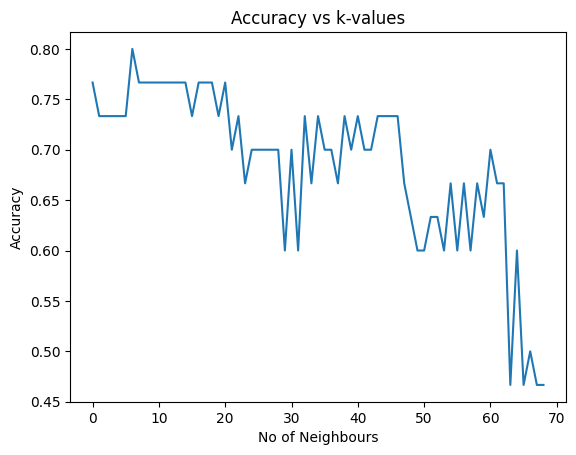

In [13]:
acc = pd.Series(accs)
acc.plot()
plt.title('Accuracy vs k-values')
plt.xlabel('No of Neighbours')
plt.ylabel('Accuracy')
plt.show()